# Disk Scheduling Algorithms


<br><b> Following Disk Scheduling Algorithms are demonstrated:<br></b>
    * N-step-scan
    * RSS
    * F-Scan
<br>
The process needs either CPU time or Input/Output Time. And for I/O it requires access to disk. The technique that operating system uses to determine the request which is to be satisfied next is called disk scheduling.<br>
<br>
<img src="image.png">
<font size = 1>
<br>Image Source:<br>
https://notesformsc.org/computer-science/operating-systems/operating-systems-disk-scheduling-algorithms/<br> </font>

<br>
 
Seek Time<br>
Seek time is the time taken in locating the disk arm to a specified track where the read/write request will be satisfied.
<br><br>
Rotational Latency<br>
It is the time taken by the desired sector to rotate itself to the position from where it can access the R/W heads.
<br><br>
Transfer Time<br>
It is the time taken to transfer the data.
<br><br>
Disk Access Time<br>
Disk access time is given as,
<br><br>
Disk Access Time = Rotational Latency + Seek Time + Transfer Time
<br><br>
Disk Response Time<br>
It is the average of time spent by each request waiting for the IO operation.

In [1]:
from matplotlib import pyplot as plt
import math

### N- Step Scan Algorithm (N-step scan algorithm)

It is also known as the N-STEP LOOK algorithm. In this, a buffer is created for N requests. All requests belonging to a buffer will be serviced in one go. Also once the buffer is full no new requests are kept in this buffer and are sent to another one. Now, when these N requests are serviced, the time comes for another top N request and this way all get requests to get a guaranteed service 


<br><br>
<b>Advantages:<br></b>
<br>
It eliminates the starvation of requests completely<br>
Throughput increases<br><br>


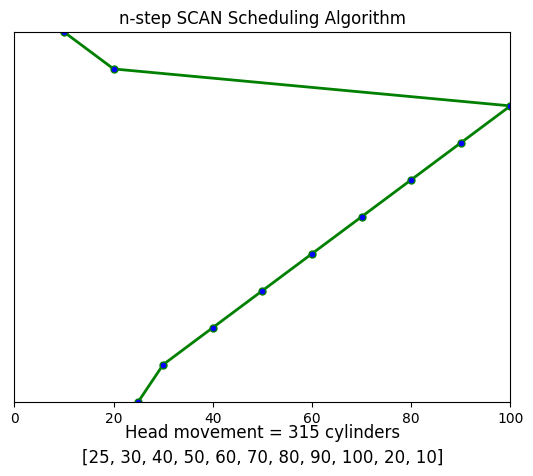

In [2]:

    

   
import matplotlib.pyplot as plt

def n_step_scan(sequence, start, n):
    if not sequence:
        print("Error: Empty sequence provided.")
        return

    temp = sequence.copy()
    temp.append(start)
    temp.sort()

    x = []
    y = []
    head_movement = 0

    # Find the index of the starting position
    start_index = temp.index(start)

    # Move the head to the right until the end of the sequence
    for i in range(start_index, len(temp)):
        x.append(temp[i])
        y.append(i - start_index)
        if len(x) > n:
            head_movement += abs(x[-1] - x[-n-1])

    # Move the head to the left from the starting position
    for i in range(start_index-1, -1, -1):
        x.append(temp[i])
        y.append(start_index - i + len(temp) - start_index - 1)
        if len(x) > n:
            head_movement += abs(x[-1] - x[-n-1])

    string = f"Head movement = {head_movement} cylinders"
    string2 = str(x)

    plt.plot(x, y, color="green", markerfacecolor="blue", marker='o', markersize=5, linewidth=2, label="n-step SCAN")
    plt.ylim(0, len(y) - 1)  # Fix the y-axis limits
    plt.xlim(0, max(temp))
    plt.yticks([])
    plt.title("n-step SCAN Scheduling Algorithm")
    plt.text(max(temp) / 2, -0.85, string, horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.text(max(temp) / 2, -1.5, string2, horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.show()

# Example usage:
sequence = [10, 20, 30, 40, 50, 60, 70, 80, 90,100]
start = 25
n = 3
n_step_scan(sequence, start, n)



### F-Scan Algorithm


This algorithm uses two sub-queues. During the scan, all requests in the first queue are serviced and the new incoming requests are added to the second queue. All new requests are kept on halt until the existing requests in the first queue are serviced. 
<br><br>
<b>Advantages:</b><br>
<br>
<br>
F-SCAN along with N-Step-SCAN prevents “arm stickiness” (phenomena in I/O scheduling where the scheduling algorithm continues to service requests at or near the current sector and thus prevents any seeking)<br><br>


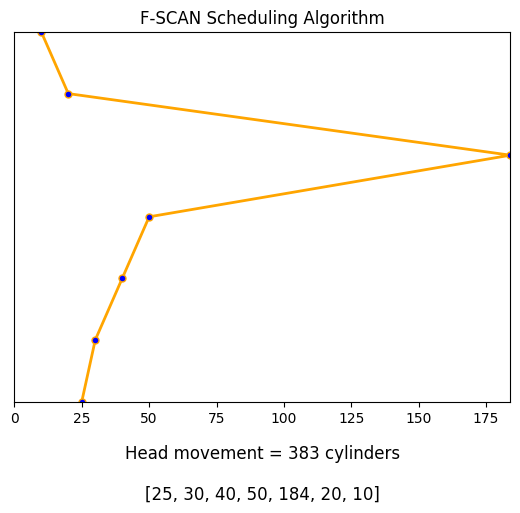

In [1]:

             
import matplotlib.pyplot as plt

def f_scan(sequence, start, f):
    temp = sequence.copy()
    temp.append(start)
    temp.sort()
    
    x = []
    y = []
    head_movement = 0
    
    # Find the index of the starting position
    start_index = temp.index(start)
    
    # Move the head to the right until the end of the sequence
    for i in range(start_index, len(temp)):
        x.append(temp[i])
        y.append(i - start_index)
        if len(x) > f:
            head_movement += abs(x[-1] - x[-f-1])
    
    # Move the head to the left from the starting position
    for i in range(start_index-1, -1, -1):
        x.append(temp[i])
        y.append(start_index - i + len(temp) - start_index - 1)
        if len(x) > f:
            head_movement += abs(x[-1] - x[-f-1])
    
    string = f"Head movement = {head_movement} cylinders"
    string2 = str(x)
    
    plt.plot(x, y, color="orange", markerfacecolor="blue", marker='o', markersize=5, linewidth=2, label="F-SCAN")
    plt.ylim(0, len(temp) - 1)
    plt.xlim(0, max(temp))
    plt.yticks([])
    plt.title("F-SCAN Scheduling Algorithm")
    plt.text(max(temp) / 2, -0.85, string, horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.text(max(temp) / 2, -1.5, string2, horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.show()

# Example usage:
sequence = [10, 20, 30, 40, 50,184]
start = 25
f = 2
f_scan(sequence, start, f)
       
    
    

### RSS() 

It stands for Random Scheduling and just like its name it is natural. It is used in situations where scheduling involves random attributes such as random processing time, random due dates, random weights, and stochastic machine breakdowns this algorithm sits perfectly. Which is why it is usually used for analysis and simulation.

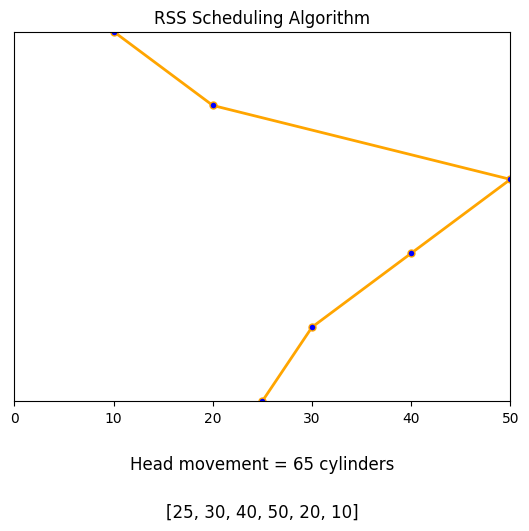

In [ ]:
def rss(sequence, start):
    temp = sequence.copy()
    temp.append(start)
    temp.sort()
    
    x = []
    y = []
    head_movement = 0
    
    # Find the index of the starting position
    start_index = temp.index(start)
    
    # Move the head to the right until the end of the sequence
    for i in range(start_index, len(temp)):
        x.append(temp[i])
        y.append(i - start_index)
        head_movement += abs(x[-1] - x[-2]) if len(x) > 1 else 0
    
    # Move the head to the left from the starting position
    for i in range(start_index-1, -1, -1):
        x.append(temp[i])
        y.append(start_index - i + len(temp) - start_index - 1)
        head_movement += abs(x[-1] - x[-2]) if len(x) > 1 else 0
    
    string = f"Head movement = {head_movement} cylinders"
    string2 = str(x)
    
    plt.plot(x, y, color="orange", markerfacecolor="blue", marker='o', markersize=5, linewidth=2, label="RSS")
    plt.ylim(0, len(temp) - 1)
    plt.xlim(0, max(temp))
    plt.yticks([])
    plt.title("RSS Scheduling Algorithm")
    plt.text(max(temp) / 2, -0.85, string, horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.text(max(temp) / 2, -1.5, string2, horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.show()

# Example usage:
sequence = [10, 20, 30, 40, 50]
start = 25
rss(sequence, start)